In [1]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
from scipy.spatial import distance_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Load the excel data
# If your excel dataset is made up of multiple sheets, you might want to specify which sheet to load using the ‘sheet_name’ column
df = pd.read_csv('excel_work.csv')

In [4]:
# Extract latitude and longitude columns
lat_lon = df[['latitude', 'longitude']].values

# Calculate the distance matrix between all polling units
dist_matrix = distance_matrix(lat_lon, lat_lon)

# Define the radius for neighbours (in kilometers)
radius_km = 1.0

# Create a list to store the outlier scores and neighbour information
results = []

In [6]:
# Iterate over each polling unit to calculate the outlier scores
for index, row in df.iterrows():
    
    # Find neighbouring polling units within the specified radius
    neighbours = df[(dist_matrix[index] <= radius_km) & (df.index != index)]

    # Calculate the outlier score for each party
    apc_outlier = abs(row['APC'] - neighbours['APC'].mean()) if not neighbours.empty else 0
    lp_outlier = abs(row['LP'] - neighbours['LP'].mean()) if not neighbours.empty else 0
    pdp_outlier = abs(row['PDP'] - neighbours['PDP'].mean()) if not neighbours.empty else 0
    nnpp_outlier = abs(row['NNPP'] - neighbours['NNPP'].mean()) if not neighbours.empty else 0

    # Store the results
    results.append({
        'PU-Name': row['PU-Name'],
        'latitude': row['latitude'],
        'longitude': row['longitude'],
        'APC_outlier': apc_outlier,
        'LP_outlier': lp_outlier,
        'PDP_outlier': pdp_outlier,
        'NNPP_outlier': nnpp_outlier,
        'Neighbours': neighbours['PU-Name'].tolist()
    })

# Convert the results list to a DataFrame
outlier_scores = pd.DataFrame(results)
#outlier_scores.to_csv('result_outlier.csv',index=False)

outlier_scores.head()


,PU-Name,latitude,longitude,APC_outlier,LP_outlier,PDP_outlier,NNPP_outlier,Neighbours
0,AUYO SPECIAL PRI. SCH. AUYO KUKA,12.332867,9.937610,93.834819,0.777184,84.860368,19.795009,"[AUYO BAYI, KOFAR AMADU AUYO KIRA, AUYO GABAS ..."
1,AUYO BAYI,12.433262,10.032115,19.845461,0.314622,28.437976,69.207900,"[AUYO SPECIAL PRI. SCH. AUYO KUKA, KOFAR AMADU..."
2,KOFAR AMADU AUYO KIRA,12.433262,10.032115,0.832294,0.686071,101.488565,46.191961,"[AUYO SPECIAL PRI. SCH. AUYO KUKA, AUYO BAYI, ..."
3,AUYO GABAS PRI. SCH. AUYO GABAS,12.335946,9.942491,18.135766,0.220694,18.401914,61.151316,"[AUYO SPECIAL PRI. SCH. AUYO KUKA, AUYO BAYI, ..."
4,"AUYO DISPENSARY, AUYO DISPENSARY",12.333290,9.936962,44.805704,0.777184,9.815805,25.231729,"[AUYO SPECIAL PRI. SCH. AUYO KUKA, AUYO BAYI, ..."


In [10]:
# Sort the dataset by the outlier scores for each party
sorted_apc = outlier_scores.sort_values(by='APC_outlier', ascending=False).head(4)
sorted_lp = outlier_scores.sort_values(by='LP_outlier', ascending=False).head(4)
sorted_pdp = outlier_scores.sort_values(by='PDP_outlier', ascending=False).head(4)
sorted_nnpp = outlier_scores.sort_values(by='NNPP_outlier', ascending=False).head(4)

# Display the top 3 outliers for each party
print("Top 3 APC Outliers:")
print(sorted_apc)
print("\nTop 3 LP Outliers:")
print(sorted_lp)
print("\nTop 3 PDP Outliers:")
print(sorted_pdp)
print("\nTop 3 NNPP Outliers:")
print(sorted_nnpp)


Top 3 APC Outliers:
                                 PU-Name   latitude  longitude  APC_outlier  \
1548  SABON GARI PRI. SCH. SABON GARI  I  11.111372   7.731787   290.227273   
3885  SABON GARI PRI. SCH. SABON GARI  I  11.111372   7.731787   290.227273   
2349           KUDIGIN PRI. SCH. KUDIGIN  12.359314   9.989061   262.095669   
12             KUDIGIN PRI. SCH. KUDIGIN  12.359314   9.989061   262.095669   

      LP_outlier  PDP_outlier  NNPP_outlier  \
1548    0.272727    67.636364      4.590909   
3885    0.272727    67.636364      4.590909   
2349    0.756303     7.532644     26.577246   
12      0.756303     7.532644     26.577246   

                                             Neighbours  
1548  [GIDAN BAKWARE K. FADA GIDAN BAKWARE, KAFUR PR...  
3885  [GIDAN BAKWARE K. FADA GIDAN BAKWARE, KAFUR PR...  
2349  [AUYO SPECIAL PRI. SCH. AUYO KUKA, AUYO BAYI, ...  
12    [AUYO SPECIAL PRI. SCH. AUYO KUKA, AUYO BAYI, ...  

Top 3 LP Outliers:
                                  PU-N

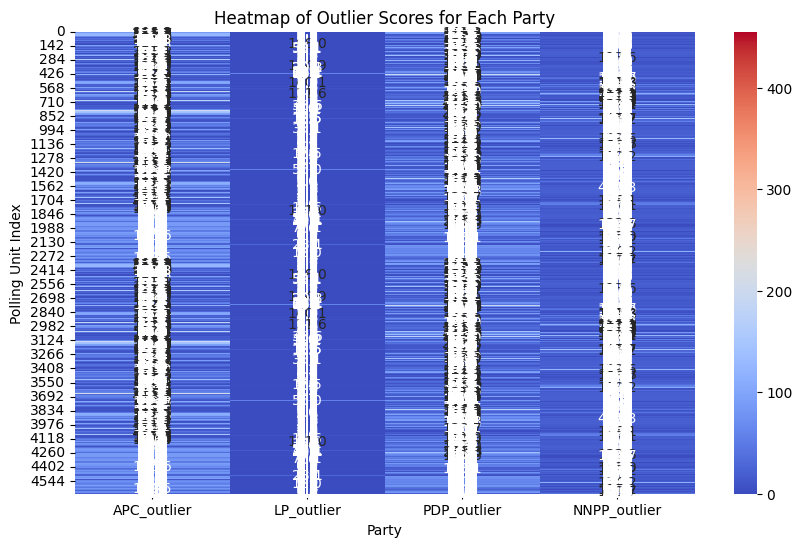

In [8]:
# Heatmap of outlier scores for each party
outlier_heatmap = outlier_scores[['APC_outlier', 'LP_outlier', 'PDP_outlier', 'NNPP_outlier']]

plt.figure(figsize=(10, 6))
sns.heatmap(outlier_heatmap, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Heatmap of Outlier Scores for Each Party')
plt.xlabel('Party')
plt.ylabel('Polling Unit Index')
plt.show()


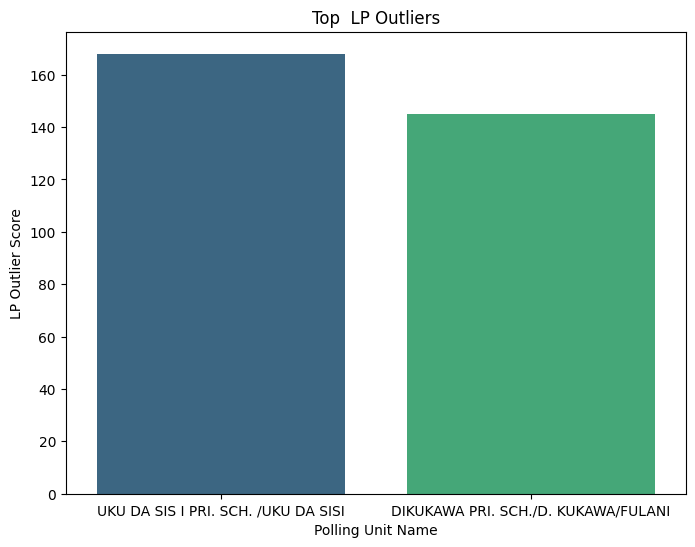

In [18]:

# Bar plot for top 3 APC outliers
plt.figure(figsize=(8, 6))
sns.barplot(data=sorted_lp, x='PU-Name', y='LP_outlier', palette='viridis')
plt.title('Top  LP Outliers')
plt.xlabel('Polling Unit Name')
plt.ylabel('LP Outlier Score')

plt.show()
